In [1]:
import numpy as np
import scipy.io as sio
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
data = sio.loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = data['X']
y = data['y']

In [4]:
m = X.shape[0] # number of examples

In [5]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

In [6]:
def displayData(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    n = X.shape[1] # total number of pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='Greys')
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show() 

A selection of 100 random images from the dataset:


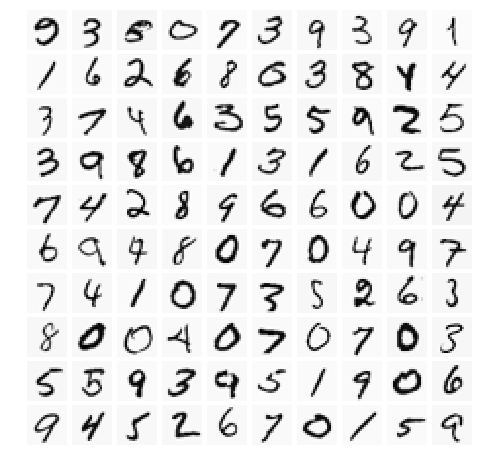

In [7]:
print('A selection of 100 random images from the dataset:')
displayData(sel)

In [8]:
theta_t = np.array([-2, -1, 1, 2])
lambda_t = 3

X_0 = np.ones([5,1])
X_i = np.reshape(np.arange(0.1, 1.6, 0.1), [5,3], order='F')
X_t = np.column_stack((X_0, X_i))
X_t
y_t = np.array([1,0,1,0,1])
y_t

array([1, 0, 1, 0, 1])

In [9]:
y_t = np.array([1,0,1,0,1])
y_t

array([1, 0, 1, 0, 1])

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
def lrCostFunction(theta, X, y, Lambda):
    '''
    Computes cost and gradient for regularised logisitic regression, without any for loops!
    '''
    m = len(y) # number of examples
    
    
    # Cost
    J = 0
    J1 = 0
    J2 = 0
    
    z = np.dot(X, theta)
    J1 = (1/m) * np.sum(-y*np.log(sigmoid(z)) - (1 - y)*np.log((1 - sigmoid(z))))
    J2 = np.sum(theta[1:]**2) * Lambda / (2*m)
    J = J1 + J2
    
    
    # Gradient
    grad = np.zeros(theta.shape)
    
    z = np.dot(X, theta)    
    grad = (1/m) * np.dot(X.T, (sigmoid(z) - y))
    grad[1:] += Lambda/m * theta[1:] 
    
    
    return J, grad

In [12]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

In [13]:
print('Test our cost function works:\n')
print('\nCost:\n %.6f' %(J))
print('Expected cost:\n 2.534819\n')
print('Gradients:\n', grad)
print('Expected gradients:')
print(' 0.146561\t -0.548558\t 0.724722\t 1.398003\n')

Test our cost function works:


Cost:
 2.534819
Expected cost:
 2.534819

Gradients:
 [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561	 -0.548558	 0.724722	 1.398003



In [14]:
def oneVsAll(X, y, num_labels, Lambda):
    '''
    Trains num_labels logistic regression classifiers and returns all
    the classifiers in a matrix all_theta, where the i-th row of all_theta 
    corresponds to the classifier for label i.
    '''
    m = X.shape[0] # number of examples
    n = X.shape[1] # number of pixels per example

    all_theta = np.zeros([num_labels, n+1])

    # Add column of ones to X for bias
    X = np.column_stack((np.ones(m), X))
    
    for c in range(num_labels):

        initial_theta = np.zeros([n+1, 1])
        # Python implementation of a Matlab/Octave logical array
        y_bools = (y==(c+1)).astype(int).reshape([m,]) # (c+1) to change 0-9 into 1-10

        res = minimize(fun=lrCostFunction, x0=initial_theta, args=(X, y_bools, Lambda),
                       method=None, jac=True, options={'maxiter':100})
        
        theta = res.x
        all_theta[c] = theta

    return all_theta

In [15]:
Lambda = 0.1
num_labels = 10 # 10 labels, from 0 to 9. Note that in y, "0" is stored as "10".

all_theta = oneVsAll(X, y, num_labels, Lambda)

In [16]:
def predictOneVsAll(all_theta, X):
    '''
    Predict the label for a trained one-vs-all classifier. The labels 
    are in the range 1...K, where K = all_theta.shape[0]. 
    '''
    p = np.zeros([X.shape[0], 1])
    
    m = X.shape[0] # number of examples
    num_labels = all_theta.shape[0] # number of categories

    # Add column of ones to X for bias
    X = np.column_stack((np.ones(m), X))
    
    z = np.dot(X, all_theta.T)
    p = np.argmax(sigmoid(z), axis=1) + 1 # +1 to change 0-9 into 1-10
    p = np.reshape(p, (m,1)) # to make compatible with y.shape
    
    return p

In [17]:
pred = predictOneVsAll(all_theta, X)
print('\nTraining Set Accuracy:', np.mean(pred == y) * 100)


Training Set Accuracy: 94.94


In [18]:
def displayPredictions(X):

    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    n = X.shape[1] # total number of pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        # Plot image
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        
        plt.imshow(image, cmap='Greys')
        plt.axis('off')
        
        # Make and print prediction for image
        rand_image = X[i]
        rand_image = rand_image.reshape([1,400])
       
        pred = predictOneVsAll(all_theta, rand_image)
        pred_int = int(pred)
        if pred_int==10: # Fix the fact that 0 is mapped to 10
            pred_int=0
    
        pred_str = 'Prediction:' + str(pred_int)
        plt.text(0,1.4, pred_str, color='b')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Display a few predictions


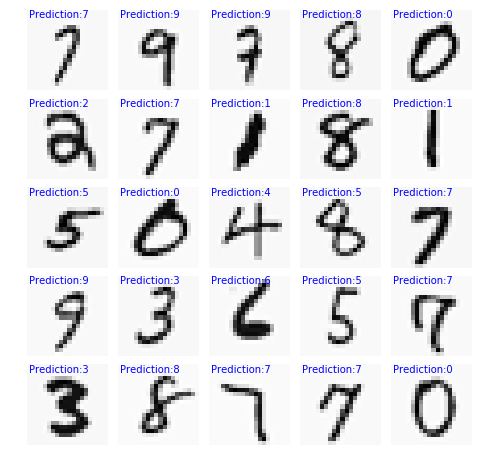

In [20]:
# Randomly select 25 images and predictions to display


m = X.shape[0]
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:25], :]
print('Display a few predictions')
displayPredictions(sel)